In [1]:
# Example for downloading COCO 2017 dataset directly
!mkdir -p /content/coco2017
!wget -P /content/coco2017 http://images.cocodataset.org/zips/train2017.zip
!wget -P /content/coco2017 http://images.cocodataset.org/zips/val2017.zip
!wget -P /content/coco2017 http://images.cocodataset.org/zips/test2017.zip
!wget -P /content/coco2017 http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# Unzipping the files
!unzip /content/coco2017/train2017.zip -d /content/coco2017/
!unzip /content/coco2017/val2017.zip -d /content/coco2017/
!unzip /content/coco2017/test2017.zip -d /content/coco2017/
!unzip /content/coco2017/annotations_trainval2017.zip -d /content/coco2017/


Streaming output truncated to the last 5000 lines.
 extracting: /content/coco2017/test2017/000000089887.jpg  
 extracting: /content/coco2017/test2017/000000274928.jpg  
 extracting: /content/coco2017/test2017/000000310028.jpg  
 extracting: /content/coco2017/test2017/000000229793.jpg  
 extracting: /content/coco2017/test2017/000000394339.jpg  
 extracting: /content/coco2017/test2017/000000564538.jpg  
 extracting: /content/coco2017/test2017/000000440585.jpg  
 extracting: /content/coco2017/test2017/000000541512.jpg  
 extracting: /content/coco2017/test2017/000000395525.jpg  
 extracting: /content/coco2017/test2017/000000235435.jpg  
 extracting: /content/coco2017/test2017/000000069964.jpg  
 extracting: /content/coco2017/test2017/000000131962.jpg  
 extracting: /content/coco2017/test2017/000000281392.jpg  
 extracting: /content/coco2017/test2017/000000534893.jpg  
 extracting: /content/coco2017/test2017/000000128676.jpg  
 extracting: /content/coco2017/test2017/000000187639.jpg  
 extr

In [2]:
%pip install tensorflow pandas numpy matplotlib pillow tqdm requests scikit-learn gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [3]:
import tensorflow as tf  # Import the TensorFlow library for deep learning tasks
import os  # Import the os module for interacting with the operating system
import json  # Import the json module for working with JSON data
import pandas as pd  # Import pandas for data manipulation and analysis
import re  # Import the re module for regular expressions
import numpy as np  # Import numpy for numerical operations
import time  # Import the time module for time-related functions
import matplotlib.pyplot as plt  # Import matplotlib for plotting and visualization
import collections  # Import collections module for specialized container datatypes
import random  # Import random module for generating random numbers
import requests  # Import requests for making HTTP requests
from math import sqrt  # Import sqrt function from math module for square root calculations
from PIL import Image  # Import Image class from PIL (Python Imaging Library) for image processing
from tqdm.auto import tqdm  # Import tqdm for progress bar visualization

In [4]:
BASE_PATH = '/content/coco2017'


In [5]:
with open(f'{BASE_PATH}/annotations/captions_train2017.json', 'r') as f:  # Open the JSON file containing captions for the training dataset
    data = json.load(f)  # Load the JSON data
    data = data['annotations']  # Extract the 'annotations' part of the data

img_cap_pairs = []  # Initialize an empty list to hold image-caption pairs

for sample in data:  # Iterate over each sample in the annotations
    img_name = '%012d.jpg' % sample['image_id']  # Format the image_id into a 12-digit zero-padded string representing the image filename
    img_cap_pairs.append([img_name, sample['caption']])  # Append the image filename and caption as a pair to the list

captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption'])  # Create a DataFrame from the list of image-caption pairs with specified column names
captions['image'] = captions['image'].apply(  # Update the 'image' column in the DataFrame
    lambda x: f'{BASE_PATH}/train2017/{x}'  # Prepend the base path to each image filename
)
captions = captions.sample(10000)  # Randomly sample 1,000 entries from the DataFrame
captions = captions.reset_index(drop=True)  # Reset the index of the DataFrame, dropping the old index
captions.to_csv('captions_sample.csv', index=False)
captions.head()  # Display the first few rows of the DataFrame

,image,caption
0,/content/coco2017/train2017/000000378950.jpg,"one slice of stuffed pizza, with sauce on top."
1,/content/coco2017/train2017/000000191376.jpg,a street that has some cars on it
2,/content/coco2017/train2017/000000373341.jpg,A FedEx truck is parked in front of an oncomin...
3,/content/coco2017/train2017/000000308672.jpg,A man walking down a road holding an umbrella ...
4,/content/coco2017/train2017/000000565722.jpg,A zebra standing in a grass field next to a fe...


In [6]:
from IPython.display import FileLink

# Save the DataFrame to a CSV file
captions.to_csv('captions_sample.csv', index=False)

# Create a link to download the file
FileLink('captions_sample.csv')


/content/captions_sample.csv

In [7]:
def preprocess(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove all characters that are not word characters or whitespace
    text = re.sub(r'[^\w\s]', '', text)

    # Replace one or more whitespace characters with a single space
    text = re.sub('\s+', ' ', text)

    # Remove leading and trailing whitespace
    text = text.strip()

    # Add '[start]' at the beginning and '[end]' at the end of the text
    text = '[start] ' + text + ' [end]'

    # Return the preprocessed text
    return text


In [8]:
captions['caption'] = captions['caption'].apply(preprocess)  # Apply the preprocess function to each caption in the 'caption' column
captions.head()  # Display the first few rows of the DataFrame to check the preprocessed captions


,image,caption
0,/content/coco2017/train2017/000000378950.jpg,[start] one slice of stuffed pizza with sauce ...
1,/content/coco2017/train2017/000000191376.jpg,[start] a street that has some cars on it [end]
2,/content/coco2017/train2017/000000373341.jpg,[start] a fedex truck is parked in front of an...
3,/content/coco2017/train2017/000000308672.jpg,[start] a man walking down a road holding an u...
4,/content/coco2017/train2017/000000565722.jpg,[start] a zebra standing in a grass field next...


[start] a couple of white busses with red stripes are lined up [end]



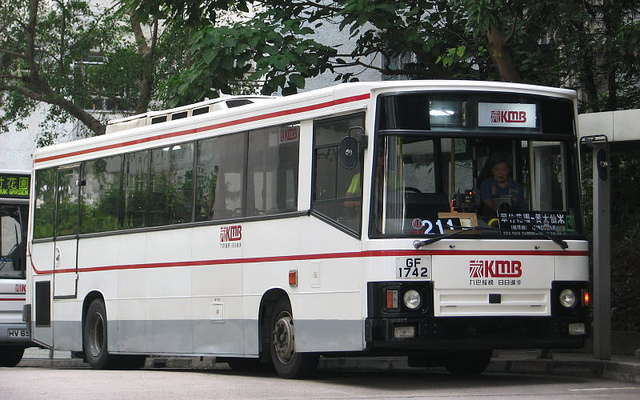

In [9]:
random_row = captions.sample(1).iloc[0]  # Randomly sample one row from the DataFrame and select the first element of the result
print(random_row.caption)  # Print the caption of the randomly selected row
print()  # Print an empty line for separation
im = Image.open(random_row.image)  # Open the image file corresponding to the randomly selected row
im  # Display the image


In [10]:
MAX_LENGTH = 40  # Define the maximum length of the sequences (captions)
VOCABULARY_SIZE = 15000  # Define the size of the vocabulary
BATCH_SIZE = 32  # Define the batch size for training
BUFFER_SIZE = 1000  # Define the buffer size for shuffling the dataset
EMBEDDING_DIM = 512  # Define the dimension of the embedding layer
UNITS = 512  # Define the number of units in the recurrent neural network (RNN) layer
EPOCHS = 10  # Define the number of epochs for training


In [11]:
tokenizer = tf.keras.layers.TextVectorization(  # Initialize a TextVectorization layer for tokenizing text
    max_tokens=VOCABULARY_SIZE,  # Set the maximum number of tokens (size of the vocabulary)
    standardize=None,  # Do not apply additional standardization since the text is already preprocessed
    output_sequence_length=MAX_LENGTH  # Set the output sequence length (maximum length of the sequences)
)

tokenizer.adapt(captions['caption'])  # Adapt the tokenizer to the captions in the DataFrame to build the vocabulary


In [12]:
tokenizer.vocabulary_size()  # Get the size of the vocabulary built by the tokenizer


5029

In [13]:
 import pickle  # Import the pickle module for serializing and deserializing Python objects

pickle.dump(tokenizer.get_vocabulary(), open('vocab_coco.file', 'wb'))  # Serialize and save the vocabulary to a file named 'vocab_coco.file'


In [14]:
word2idx = tf.keras.layers.StringLookup(  # Create a StringLookup layer to map words to their corresponding indices
    mask_token="",  # Specify that there is no mask token
    vocabulary=tokenizer.get_vocabulary()  # Use the vocabulary from the tokenizer
)

idx2word = tf.keras.layers.StringLookup(  # Create a StringLookup layer to map indices back to their corresponding words
    mask_token="",  # Specify that there is no mask token
    vocabulary=tokenizer.get_vocabulary(),  # Use the same vocabulary from the tokenizer
    invert=True  # Set invert=True to invert the mapping (indices to words)
)


In [16]:
img_to_cap_vector = collections.defaultdict(list)  # Create a default dictionary to map images to their corresponding captions
for img, cap in zip(captions['image'], captions['caption']):  # Iterate over images and captions in the DataFrame
    img_to_cap_vector[img].append(cap)  # Append each caption to the list corresponding to its image

img_keys = list(img_to_cap_vector.keys())  # Get a list of all image keys
random.shuffle(img_keys)  # Shuffle the list of image keys

slice_index = int(len(img_keys) * 0.8)  # Determine the index to split the data into training and validation sets (80% training, 20% validation)
img_name_train_keys, img_name_val_keys = (img_keys[:slice_index],  # Split the image keys into training keys
                                          img_keys[slice_index:])  # and validation keys

train_imgs = []  # Initialize a list to hold training images
train_captions = []  # Initialize a list to hold training captions
for imgt in img_name_train_keys:  # Iterate over training image keys
    capt_len = len(img_to_cap_vector[imgt])  # Get the number of captions for each training image
    train_imgs.extend([imgt] * capt_len)  # Extend the training images list with repeated image keys
    train_captions.extend(img_to_cap_vector[imgt])  # Extend the training captions list with the corresponding captions

val_imgs = []  # Initialize a list to hold validation images
val_captions = []  # Initialize a list to hold validation captions
for imgv in img_name_val_keys:  # Iterate over validation image keys
    capv_len = len(img_to_cap_vector[imgv])  # Get the number of captions for each validation image
    val_imgs.extend([imgv] * capv_len)  # Extend the validation images list with repeated image keys
    val_captions.extend(img_to_cap_vector[imgv])  # Extend the validation captions list with the corresponding captions


In [17]:
len(train_imgs), len(train_captions), len(val_imgs), len(val_captions)  # Get the lengths of the training and validation images and captions lists


(7991, 7991, 2009, 2009)

In [18]:
def load_data(img_path, caption):
    img = tf.io.read_file(img_path)  # Read the image file from the given path
    img = tf.io.decode_jpeg(img, channels=3)  # Decode the JPEG image to a tensor with 3 color channels
    img = tf.keras.layers.Resizing(299, 299)(img)  # Resize the image to 299x299 pixels
    img = tf.keras.applications.inception_v3.preprocess_input(img)  # Preprocess the image for InceptionV3 model input
    caption = tokenizer(caption)  # Tokenize the caption using the tokenizer
    return img, caption  # Return the preprocessed image and the tokenized caption


In [19]:
# Create a TensorFlow dataset from the training images and captions
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_imgs, train_captions)
)

# Apply the load_data function to each element in the dataset, shuffle, and batch the dataset
train_dataset = train_dataset.map(
    load_data, num_parallel_calls=tf.data.AUTOTUNE  # Use AUTOTUNE to optimize the number of parallel calls
).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)  # Batch the dataset with the specified batch size

# Create a TensorFlow dataset from the validation images and captions
val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_imgs, val_captions)
)

# Apply the load_data function to each element in the dataset, shuffle, and batch the dataset
val_dataset = val_dataset.map(
    load_data, num_parallel_calls=tf.data.AUTOTUNE  # Use AUTOTUNE to optimize the number of parallel calls
).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)  # Shuffle and Batch the dataset with the specified batch size


In [20]:
# Create a sequential model for image augmentation
image_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.2),  # Randomly rotate images by up to 20%
    tf.keras.layers.RandomContrast(0.3),  # Randomly adjust contrast by up to 30%
])


In [21]:
def CNN_Encoder():
    # Load the InceptionV3 model pre-trained on ImageNet, excluding the top classification layer
    inception_v3 = tf.keras.applications.InceptionV3(
        include_top=False,  # Exclude the top classification layer
        weights='imagenet'  # Load weights pre-trained on ImageNet
    )

    # Get the output of the InceptionV3 model
    output = inception_v3.output
    # Reshape the output to have a shape of (-1, channels), where -1 represents the spatial dimensions
    output = tf.keras.layers.Reshape((-1, output.shape[-1]))(output)

    # Create a new model that takes the same input as InceptionV3 and outputs the reshaped output
    cnn_model = tf.keras.models.Model(inception_v3.input, output)
    return cnn_model  # Return the CNN model


In [22]:
class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        # Define the first layer normalization layer
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()
        # Define the second layer normalization layer
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()
        # Define the multi-head attention layer
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,  # Number of attention heads
            key_dim=embed_dim  # Dimension of the attention key
        )
        # Define a dense layer with ReLU activation
        self.dense = tf.keras.layers.Dense(embed_dim, activation="relu")

    def call(self, x, training):
        # Apply the first layer normalization
        x = self.layer_norm_1(x)
        # Apply the dense layer
        x = self.dense(x)

        # Compute the attention output
        attn_output = self.attention(
            query=x,  # Query for attention
            value=x,  # Value for attention
            key=x,  # Key for attention
            attention_mask=None,  # No attention mask
            training=training  # Training flag
        )

        # Apply the second layer normalization to the sum of input and attention output
        x = self.layer_norm_2(x + attn_output)
        return x  # Return the output


In [23]:
class Embeddings(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embed_dim, max_len):
        super().__init__()
        # Define the token embeddings layer
        self.token_embeddings = tf.keras.layers.Embedding(
            vocab_size, embed_dim  # Vocabulary size and embedding dimension
        )
        # Define the position embeddings layer
        self.position_embeddings = tf.keras.layers.Embedding(
            max_len, embed_dim, input_shape=(None, max_len)  # Maximum length and embedding dimension
        )

    def call(self, input_ids):
        # Get the length of the input sequence
        length = tf.shape(input_ids)[-1]
        # Create a tensor with position indices
        position_ids = tf.range(start=0, limit=length, delta=1)
        # Expand dimensions to match the input shape
        position_ids = tf.expand_dims(position_ids, axis=0)

        # Get the token embeddings for the input IDs
        token_embeddings = self.token_embeddings(input_ids)
        # Get the position embeddings for the position IDs
        position_embeddings = self.position_embeddings(position_ids)

        # Return the sum of token embeddings and position embeddings
        return token_embeddings + position_embeddings


In [25]:
class TransformerDecoderLayer(tf.keras.layers.Layer):
    def __init__(self, embed_dim, units, num_heads):
        super().__init__()
        # Define the embedding layer using the custom Embeddings class
        self.embedding = Embeddings(
            tokenizer.vocabulary_size(), embed_dim, MAX_LENGTH  # Pass the vocabulary size, embedding dimension, and maximum length
        )

        # Define the first multi-head attention layer
        self.attention_1 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,  # Number of attention heads
            key_dim=embed_dim,  # Dimension of the attention key
            dropout=0.1  # Dropout rate
        )
        # Define the second multi-head attention layer
        self.attention_2 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,  # Number of attention heads
            key_dim=embed_dim,  # Dimension of the attention key
            dropout=0.1  # Dropout rate
        )

        # Define layer normalization layers
        self.layernorm_1 = tf.keras.layers.LayerNormalization()  # First layer normalization
        self.layernorm_2 = tf.keras.layers.LayerNormalization()  # Second layer normalization
        self.layernorm_3 = tf.keras.layers.LayerNormalization()  # Third layer normalization

        # Define feedforward network layers
        self.ffn_layer_1 = tf.keras.layers.Dense(units, activation="relu")  # First dense layer with ReLU activation
        self.ffn_layer_2 = tf.keras.layers.Dense(embed_dim)  # Second dense layer

        # Define the output layer
        self.out = tf.keras.layers.Dense(tokenizer.vocabulary_size(), activation="softmax")  # Output layer with softmax activation

        # Define dropout layers
        self.dropout_1 = tf.keras.layers.Dropout(0.3)  # First dropout layer with 30% dropout rate
        self.dropout_2 = tf.keras.layers.Dropout(0.5)  # Second dropout layer with 50% dropout rate

    def call(self, input_ids, encoder_output, training, mask=None):
        embeddings = self.embedding(input_ids)  # Get the embeddings for the input IDs

        combined_mask = None  # Initialize combined mask
        padding_mask = None  # Initialize padding mask

        if mask is not None:  # Check if mask is provided
            # Generate causal mask
            causal_mask = self.get_causal_attention_mask(embeddings)  # Create causal mask for the embeddings
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)  # Cast mask to integer type
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)  # Combine mask
            combined_mask = tf.minimum(combined_mask, causal_mask)  # Take minimum of combined mask and causal mask

        # Apply the first attention layer
        attn_output_1 = self.attention_1(
            query=embeddings,  # Query is the embeddings
            value=embeddings,  # Value is also the embeddings
            key=embeddings,  # Key is also the embeddings
            attention_mask=combined_mask,  # Use the combined mask
            training=training  # Specify if training
        )

        out_1 = self.layernorm_1(embeddings + attn_output_1)  # Add the attention output to the embeddings and apply layer normalization

        # Apply the second attention layer
        attn_output_2 = self.attention_2(
            query=out_1,  # Query is the output from the first attention layer
            value=encoder_output,  # Value is the encoder output
            key=encoder_output,  # Key is the encoder output
            attention_mask=padding_mask,  # Use the padding mask
            training=training  # Specify if training
        )

        out_2 = self.layernorm_2(out_1 + attn_output_2)  # Add the second attention output to the first output and apply layer normalization

        ffn_out = self.ffn_layer_1(out_2)  # Apply the first feedforward layer
        ffn_out = self.dropout_1(ffn_out, training=training)  # Apply the first dropout layer
        ffn_out = self.ffn_layer_2(ffn_out)  # Apply the second feedforward layer

        ffn_out = self.layernorm_3(ffn_out + out_2)  # Add the feedforward output to the second output and apply layer normalization
        ffn_out = self.dropout_2(ffn_out, training=training)  # Apply the second dropout layer
        preds = self.out(ffn_out)  # Get the final predictions from the output layer
        return preds  # Return the predictions

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)  # Get the shape of the inputs
        batch_size, sequence_length = input_shape[0], input_shape[1]  # Get batch size and sequence length
        i = tf.range(sequence_length)[:, tf.newaxis]  # Create a range tensor for sequence length
        j = tf.range(sequence_length)  # Create another range tensor for sequence length
        mask = tf.cast(i >= j, dtype="int32")  # Create a causal mask by comparing the ranges
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))  # Reshape the mask to match input dimensions
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],  # Concatenate batch size with mask dimensions
            axis=0  # Concatenate along axis 0
        )
        return tf.tile(mask, mult)  # Tile the mask to match the batch size and return it


In [26]:
class ImageCaptioningModel(tf.keras.Model):

    def __init__(self, cnn_model, encoder, decoder, image_aug=None):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.image_aug = image_aug
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.acc_tracker = tf.keras.metrics.Mean(name="accuracy")  # Ensure accuracy metric is named "accuracy"

    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def compute_loss_and_acc(self, img_embed, captions, training=True):
        encoder_output = self.encoder(img_embed, training=True)
        y_input = captions[:, :-1]
        y_true = captions[:, 1:]
        mask = (y_true != 0)
        y_pred = self.decoder(y_input, encoder_output, training=True, mask=mask)
        loss = self.calculate_loss(y_true, y_pred, mask)
        acc = self.calculate_accuracy(y_true, y_pred, mask)
        return loss, acc

    def train_step(self, batch):
        imgs, captions = batch

        if self.image_aug:
            imgs = self.image_aug(imgs)

        img_embed = self.cnn_model(imgs)

        with tf.GradientTape() as tape:
            loss, acc = self.compute_loss_and_acc(img_embed, captions)

        train_vars = self.encoder.trainable_variables + self.decoder.trainable_variables
        grads = tape.gradient(loss, train_vars)
        self.optimizer.apply_gradients(zip(grads, train_vars))
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)

        return {"loss": self.loss_tracker.result(), "accuracy": self.acc_tracker.result()}

    def test_step(self, batch):
        imgs, captions = batch

        img_embed = self.cnn_model(imgs)

        loss, acc = self.compute_loss_and_acc(img_embed, captions, training=False)

        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)

        return {"loss": self.loss_tracker.result(), "accuracy": self.acc_tracker.result()}

    @property
    def metrics(self):
        return [self.loss_tracker, self.acc_tracker]


In [27]:
# Instantiate the TransformerEncoderLayer with the specified embedding dimension and number of heads
encoder = TransformerEncoderLayer(EMBEDDING_DIM, 1)

# Instantiate the TransformerDecoderLayer with the specified embedding dimension, number of units, and number of heads
decoder = TransformerDecoderLayer(EMBEDDING_DIM, UNITS, 8)

# Instantiate the CNN model for encoding images
cnn_model = CNN_Encoder()

# Create the image captioning model with the specified CNN model, encoder, decoder, and optional image augmentation
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model,  # CNN model for image feature extraction
    encoder=encoder,  # Encoder model
    decoder=decoder,  # Decoder model
    image_aug=image_augmentation,  # Image augmentation layer
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
# Define the loss function using SparseCategoricalCrossentropy
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,  # Indicates that the predictions are probabilities
    reduction="none"  # Do not reduce the loss, keep it element-wise
)

# Define an early stopping callback to stop training if validation performance stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=3,  # Number of epochs to wait after the last improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Compile the captioning model
caption_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=cross_entropy,
    metrics=["accuracy"]  # Include accuracy in the metrics
)


In [29]:
# Train the captioning model
history = caption_model.fit(
    train_dataset,  # Training dataset
    epochs=EPOCHS,  # Number of epochs to train for
    validation_data=val_dataset,  # Validation dataset
    callbacks=[early_stopping]  # List of callbacks to apply during training
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 150s 472ms/step - accuracy: 0.1676 - loss: 5.7316 - val_accuracy: 0.2887 - val_loss: 4.5925
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 94s 333ms/step - accuracy: 0.2959 - loss: 4.3975 - val_accuracy: 0.3264 - val_loss: 4.1290
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 329ms/step - accuracy: 0.3312 - loss: 3.9622 - val_accuracy: 0.3359 - val_loss: 3.9453
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 330ms/step - accuracy: 0.3545 - loss: 3.6425 - val_accuracy: 0.3457 - val_loss: 3.8742
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 328ms/step - accuracy: 0.3699 - loss: 3.4482 - val_accuracy: 0.3607 - val_loss: 3.7877
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 325ms/step - accuracy: 0.3847 - loss: 3.2460 - val_accuracy: 0.3581 - val_loss: 3.7781
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 327ms/step - accuracy: 0.3980 - loss: 3.1031 - val_accuracy: 0.3639 - val_loss: 3.7605
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 332ms/step - accuracy: 0.4100 - loss

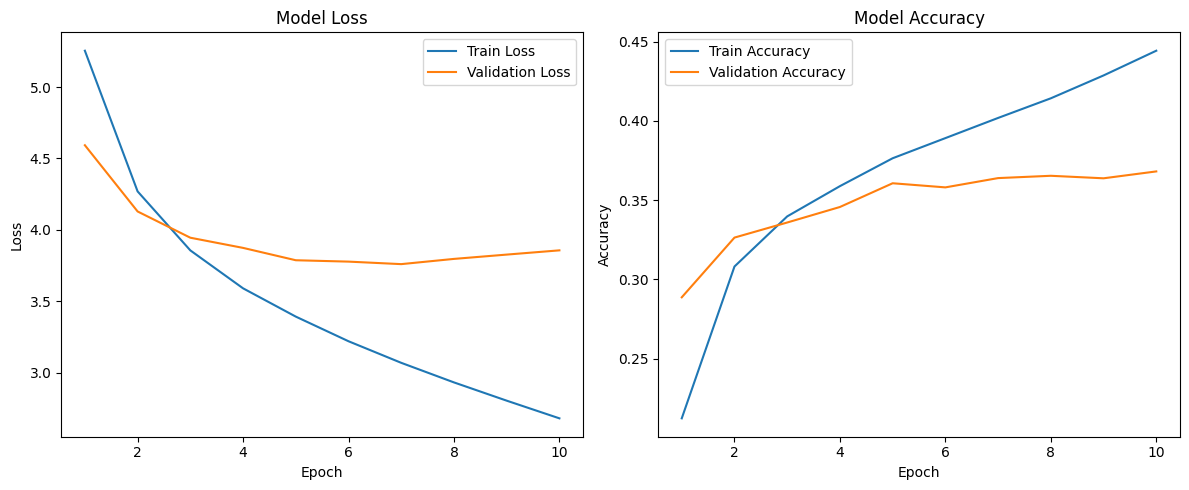

In [30]:
# Adjusting the x-axis values to start from 1
epochs = range(1, len(history.history['loss']) + 1)

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))  # Create a figure with a specific size

# Subplot for loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, history.history['loss'], label='Train Loss')  # Plot training loss with a label
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')  # Plot validation loss with a label
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add a legend to differentiate between the training and validation loss

# Subplot for accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy with a label
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy with a label
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()  # Add a legend to differentiate between the training and validation accuracy

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()  # Display the plot


In [1]:
import gradio as gr  # Import Gradio for creating the web interface
import pandas as pd  # Import pandas for handling the DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine similarity for comparing text
import numpy as np  # Import NumPy for numerical operations
import tensorflow as tf  # Import TensorFlow for deep learning operations
from PIL import Image  # Import PIL for image processing
import os  # Import os for file handling

# Load Captions DataFrame
captions = pd.read_csv('captions_sample.csv')  # Replace with your actual file

# Compute TF-IDF embeddings for all captions in the dataset
vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer
caption_embeddings = vectorizer.fit_transform(captions['caption'].tolist())  # Fit and transform the captions to get embeddings

def find_similar_caption(prompt, caption_embeddings, captions):
    # Compute TF-IDF embedding for the input prompt
    prompt_embedding = vectorizer.transform([prompt])  # Transform the input prompt to its TF-IDF representation
    # Compute cosine similarity between the prompt and all captions
    similarities = cosine_similarity(prompt_embedding, caption_embeddings)  # Calculate the cosine similarities
    # Find the index of the most similar caption
    most_similar_idx = np.argmax(similarities)  # Get the index of the highest similarity score
    return captions.iloc[most_similar_idx]  # Return the most similar caption entry

def load_image_from_path(img_path):
    # Read and preprocess the image from the given path
    img = tf.io.read_file(img_path)  # Read the image file
    img = tf.io.decode_jpeg(img, channels=3)  # Decode the JPEG image
    img = tf.keras.layers.Resizing(299, 299)(img)  # Resize the image to 299x299 pixels
    img = tf.image.convert_image_dtype(img, tf.float32)  # Convert the image to float32
    img = tf.keras.applications.inception_v3.preprocess_input(img)  # Preprocess the image for InceptionV3
    return img  # Return the preprocessed image

def generate_caption(img_path):
    # Generate a caption for the image at the given path
    img = load_image_from_path(img_path)  # Load and preprocess the image

    img = tf.expand_dims(img, axis=0)  # Expand dimensions to create a batch of size 1
    img_embed = caption_model.cnn_model(img)  # Get image embeddings from the CNN model
    img_encoded = caption_model.encoder(img_embed, training=False)  # Encode the image embeddings using the encoder

    y_inp = '[start]'  # Initialize the input with the start token
    for i in range(MAX_LENGTH - 1):  # Iterate until the maximum length is reached
        tokenized = tokenizer([y_inp])[:, :-1]  # Tokenize the current input
        mask = tf.cast(tokenized != 0, tf.int32)  # Create a mask for non-zero tokens
        pred = caption_model.decoder(tokenized, img_encoded, training=False, mask=mask)  # Get predictions from the decoder

        pred_idx = np.argmax(pred[0, i, :])  # Get the index of the highest probability prediction
        pred_idx = tf.convert_to_tensor(pred_idx)  # Convert the prediction index to a tensor
        pred_word = idx2word(pred_idx).numpy().decode('utf-8')  # Convert the index to the corresponding word
        if pred_word == '[end]':  # Stop if the end token is predicted
            break

        y_inp += ' ' + pred_word  # Append the predicted word to the input sequence

    y_inp = y_inp.replace('[start] ', '')  # Remove the start token from the final output
    return y_inp  # Return the generated caption

def get_image_from_prompt(prompt, caption_embeddings, captions):
    # Find the most similar caption and return the image path and caption
    similar_caption_entry = find_similar_caption(prompt, caption_embeddings, captions)  # Find the similar caption
    img_path = similar_caption_entry['image']  # Get the image path
    return img_path  # Return the image path

def generate_caption_and_display(prompt):
    # Generate a caption and display the image for a given prompt
    img_path = get_image_from_prompt(prompt, caption_embeddings, captions)  # Get the image path
    generate_caption(img_path)  # Generate the caption for the image (side effect)

    img = Image.open(img_path)  # Open the image

    # Ensure the directory for saving the image exists
    output_dir = "/mnt/data"
    os.makedirs(output_dir, exist_ok=True)

    # Save the image temporarily to provide a download link
    img_temp_path = os.path.join(output_dir, "temp_image.png")
    img.save(img_temp_path)

    return img  # Return the image

# Define the Gradio interface
iface = gr.Interface(
    fn=generate_caption_and_display,  # Function to be called
    inputs=[
        gr.Textbox(label="Prompt")  # Textbox input for the prompt
    ],
    outputs=[
        gr.Image(type="pil", label="Image")  # Image output
    ],
    title="Text to Image Generator",  # Title of the interface
    description="Enter a text prompt to find a similar image."  # Description of the interface
)

# Launch the interface
iface.launch()  # Launch the Gradio interface


ModuleNotFoundError: No module named 'gradio'

In [ ]:
# Save the weights of the captioning model to a file named 'model.weights.h5'
caption_model.save_weights('model.weights.h5')
